In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = os.path.join(os.getcwd(), "time data")
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

for file, df in dataframes.items():
    print(f"\n--- First 5 rows of {file} ---")
    print(df.head())


--- First 5 rows of Real_Estate_(Base_Data).csv ---
   RecordID_Int ParcelNumber StreetNumber   StreetName Unit  \
0             1    010001000         1117   EMMET ST N  NaN   
1             2    010001100      1035-67  MILLMONT ST  NaN   
2             3    010001200         1159  MILLMONT ST  NaN   
3             4    010001300      1135-37  MILLMONT ST  NaN   
4             5    010001400         1111  MILLMONT ST  NaN   

                     StateCode  TaxType   Zone  TaxDist  \
0  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
1  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
2  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
3  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
4  4.0 Commercial & Industrial  Taxable  NX-10      NaN   

                                        Legal  Acreage   GPIN  
0  39.832 ACRES BARRACKS ROAD SHOPPING CENTER    39.83   1326  
1                           PARCEL W WEST BAR     2.14  15071  
2                    

In [3]:
merged_df = None

for file, df in dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on="ParcelNumber", how="inner")  # Inner join


merged_df.to_csv("merged_data.csv", index=False)
merged_df.head()

,RecordID_Int_x,ParcelNumber,StreetNumber_x,StreetName_x,Unit_x,StateCode,TaxType,Zone,TaxDist,Legal,...,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,RecordID_Int,SaleDate,SaleAmount,StreetName,StreetNumber,Unit,BookPage
0,7,010001600,600,MASSIE RD,NaN,7.6 Exempt Educational,Exempt,CM,NaN,80 AC JAG SCHOOL,...,Wood,2.00,3672.0,28,1900/01/01 05:00:00+00,0,MASSIE RD,600,NaN,0:0
1,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,64,2024/06/28 04:00:00+00,581500,BARRACKS RD,2030,NaN,2024:1553
2,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,65,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
3,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,66,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
4,16,010006000,2028,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOTS 9 & 10 BK 10 RUGBY,...,Brick Veneer,2.00,2786.0,67,2023/12/15 05:00:00+00,1305000,BARRACKS RD,2028,NaN,2023:2799


In [4]:
merged_df.columns.tolist()

['RecordID_Int_x',
 'ParcelNumber',
 'StreetNumber_x',
 'StreetName_x',
 'Unit_x',
 'StateCode',
 'TaxType',
 'Zone',
 'TaxDist',
 'Legal',
 'Acreage',
 'GPIN',
 'RecordID_Int_y',
 'StreetNumber_y',
 'StreetName_y',
 'Unit_y',
 'UseCode',
 'Style',
 'Grade',
 'Roof',
 'Flooring',
 'Heating',
 'Fireplace',
 'YearBuilt',
 'TotalRooms',
 'Bedrooms',
 'HalfBathrooms',
 'FullBathrooms',
 'BasementGarage',
 'Basement',
 'FinishedBasement',
 'BasementType',
 'ExternalWalls',
 'NumberOfStories',
 'SquareFootageFinishedLiving',
 'RecordID_Int',
 'SaleDate',
 'SaleAmount',
 'StreetName',
 'StreetNumber',
 'Unit',
 'BookPage']

In [5]:
columns_to_keep = ['ParcelNumber','SaleAmount', 'SaleDate','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade']
merged_df = merged_df[[col for col in columns_to_keep if col in merged_df.columns]]
merged_df.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade
0,010001600,0,1900/01/01 05:00:00+00,4,1920.0,3672.0,A
1,010005000,581500,2024/06/28 04:00:00+00,NaN,NaN,NaN,NaN
2,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
3,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
4,010006000,1305000,2023/12/15 05:00:00+00,5,1940.0,2786.0,A


In [34]:
merged_df = merged_df.dropna()
merged_df_clean = merged_df[merged_df["SaleAmount"] != 0]
merged_df_clean.to_csv("merged_data_clean.csv", index=False)
merged_df_clean = merged_df_clean[merged_df_clean.apply(lambda row: 'No dat' not in row.values, axis=1)]
merged_df_clean = merged_df_clean[merged_df_clean['Bedrooms'] != '2215']
merged_df_clean['Bedrooms'] = pd.to_numeric(merged_df_clean['Bedrooms'], errors='coerce').astype('Int64')
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] >= 1950]
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] <= 2025]
merged_df_clean['SaleDate'] = pd.to_datetime(merged_df_clean['SaleDate'])
merged_df_clean['SaleDate'] = merged_df_clean['SaleDate'].dt.year
grade_mapping = {
    "A++": 10, "A +": 9, "A": 8.5, "A -": 8,
    "B++": 7.5, "B +": 7, "B": 6.5, "B -": 6,
    "C++": 5.5, "C +": 5, "C": 4.5, "C -": 4,
    "D +": 3.5, "D": 3, "D -": 2.5, "E": 2
}
merged_df_clean['Grade out of 10'] = merged_df_clean['Grade'].map(grade_mapping)
merged_df_clean.to_csv("cleaned_housing.csv", index=False)
merged_df_clean.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade,Grade out of 10
14,010010000,575000,2018,4,1950.0,2144.0,B++,7.5
15,010011000,205000,1984,6,1954.0,3392.0,B +,7.0
16,010011000,970000,2018,6,1954.0,3392.0,B +,7.0
17,010012000,785000,2020,3,1952.0,2520.0,B++,7.5
18,010012000,512000,2015,3,1952.0,2520.0,B++,7.5


In [7]:
merged_df_clean['Bedrooms'].unique()

<IntegerArray>
[4, 6, 3, 2, 7, 5, 1, 8, 10, 0, 12, 9]
Length: 12, dtype: Int64

In [8]:
merged_df_clean['Grade'].unique()

array(['B++', 'B +', 'A -', 'A', 'C', 'B', 'B -', 'C++', 'C +', 'A +',
       'D', 'C -', 'A++', 'D +', 'D -', 'E'], dtype=object)

In [35]:
merged_df_clean['Grade out of 10'].unique()

array([ 7.5,  7. ,  8. ,  8.5,  4.5,  6.5,  6. ,  5.5,  5. ,  9. ,  3. ,
        4. , 10. ,  3.5,  2.5,  2. ])

In [9]:
merged_df_clean['YearBuilt'].unique()

array([1950., 1954., 1952., 1958., 2002., 1951., 1970., 1953., 2005.,
       1956., 1957., 1955., 1979., 2014., 1990., 1971., 1969., 1964.,
       2000., 1960., 1980., 1959., 1981., 1968., 2010., 1975., 1973.,
       1967., 2023., 2006., 1994., 1997., 1998., 1999., 2001., 2004.,
       1963., 2013., 2015., 2011., 2021., 1962., 1966., 1961., 1976.,
       1987., 1972., 1992., 1983., 1991., 2016., 1993., 2007., 1984.,
       1965., 2022., 1986., 2012., 2017., 1978., 2019., 2009., 1996.,
       2008., 1985., 2018., 1989., 1977., 1982., 2020., 1995., 1974.,
       2003., 1988., 2024.])

In [17]:
merged_df_clean['SaleDate'].unique()

array([2018, 1984, 2020, 2015, 1973, 2002, 1996, 1958, 2017, 2000, 1993,
       2005, 2008, 2003, 2001, 2006, 2023, 2010, 2022, 1994, 1989, 1991,
       2019, 1999, 2004, 2014, 2007, 1995, 2012, 2021, 1997, 1985, 2013,
       1979, 1992, 1976, 2016, 1971, 1952, 2024, 2011, 2009, 1983, 1988,
       1998, 1986, 1977, 1980, 1972, 1970, 1987, 1990, 1978, 1951, 1953,
       1982, 1974, 1975, 1969, 1963, 1954, 1965, 1957, 1961, 1981, 1968,
       1967, 1962, 1966, 1964, 1956, 1955, 1960, 1946, 1959, 1950, 1947,
       1949, 1909, 1945, 1944, 1948])

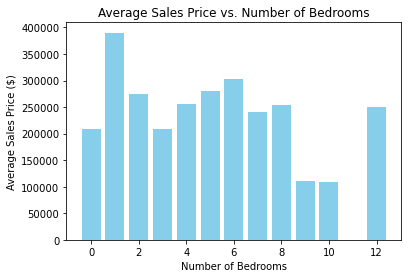

In [10]:
avg_prices = merged_df_clean.groupby('Bedrooms')['SaleAmount'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Number of Bedrooms')

# Show the chart
plt.show()

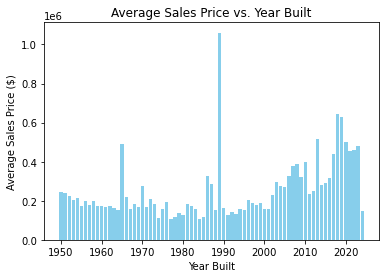

In [11]:
avg_prices = merged_df_clean.groupby('YearBuilt')['SaleAmount'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Year Built')

# Show the chart
plt.show()

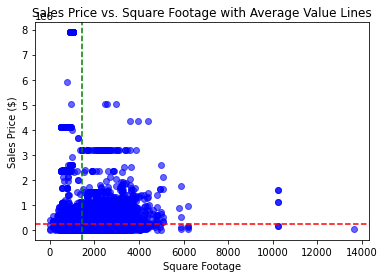

In [12]:
x = merged_df_clean['SquareFootageFinishedLiving']
y = merged_df_clean['SaleAmount']

plt.scatter(x, y, color='blue', alpha=0.6)

x_avg = np.mean(x)
y_avg = np.mean(y)

plt.axhline(y_avg, color='red', linestyle='--', label=f'Avg Y: {y_avg:.2f}')

# Optionally, add a vertical line at the average x-value
plt.axvline(x_avg, color='green', linestyle='--', label=f'Avg X: {x_avg:.2f}')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Sales Price ($)')
plt.title('Sales Price vs. Square Footage with Average Value Lines')

# Show the plot
plt.show()

In [19]:
merged_df_clean.loc[:,['SaleDate', 'SaleAmount']].groupby(['SaleDate']).describe()

SaleAmount                                                            \
              count          mean           std       min       25%       50%   
SaleDate                                                                        
1909            1.0  1.650000e+05           NaN  165000.0  165000.0  165000.0   
1944            1.0  2.500000e+03           NaN    2500.0    2500.0    2500.0   
1945            2.0  1.340000e+03  7.636753e+02     800.0    1070.0    1340.0   
1946            3.0  3.883333e+03  4.875021e+03     750.0    1075.0    1400.0   
1947            1.0  7.000000e+02           NaN     700.0     700.0     700.0   
...             ...           ...           ...       ...       ...       ...   
2020          616.0  3.989910e+05  2.510191e+05   35000.0  250000.0  360000.0   
2021          691.0  4.280294e+05  2.587164e+05   20000.0  269000.0  376000.0   
2022          651.0  1.003032e+06  1.668813e+06    1500.0  315000.0  426000.0   
2023          399.0  5.228821e+05  4.221584e+05   15000.0  304500.0  425000.0   
2024          408.0  6.409833e+05  4.977315e+05   10000.0  378750.0  495000.0   

                               
               75%        max  
SaleDate                       
1909      165000.0   165000.0  
1944        2500.0     2500.0  
1945        1610.0     1880.0  
1946        5450.0     9500.0  
1947         700.0      700.0  
...            ...        ...  
2020      480000.0  2400000.0  
2021      495087.5  2100000.0  
2022      655000.0  7894904.0  
2023      601000.0  5900000.0  
2024      700000.0  2600000.0  

[82 rows x 8 columns]

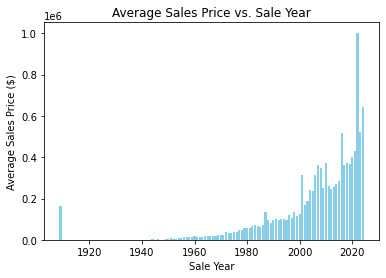

In [20]:
avg_prices = merged_df_clean.groupby('SaleDate')['SaleAmount'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Sale Year')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Sale Year')

# Show the chart
plt.show()

In [36]:
from sklearn import tree

columns_to_keep1 = ['SaleAmount', 'SaleDate','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade out of 10']
reg_df = merged_df_clean[[col for col in columns_to_keep1 if col in merged_df_clean.columns]]
reg_df.head()

,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade out of 10
14,575000,2018,4,1950.0,2144.0,7.5
15,205000,1984,6,1954.0,3392.0,7.0
16,970000,2018,6,1954.0,3392.0,7.0
17,785000,2020,3,1952.0,2520.0,7.5
18,512000,2015,3,1952.0,2520.0,7.5


In [37]:
from sklearn.model_selection import train_test_split

def quick_tree(df,depth=5):
    # Resample and Process data:
    df_t = reg_df.sample(n=df.shape[0],replace=True)
    y = df_t['SaleAmount']
    X = df_t.drop(['SaleAmount'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(X_test, y_test) # Fit the classifier
    # Visualize results:
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    # Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_train.mean())**2 )
    Rsq = 1 - SSE/TSS
    print(Rsq)

0.6120456408118446


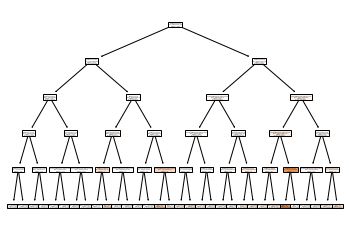

In [38]:
quick_tree(reg_df)

In [40]:
# Split data into training rows and testing rows:
N = reg_df.shape[0]
reg_df = reg_df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = reg_df[0:train_size]
N_train = df_train.shape[0]
df_test = reg_df[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['SaleAmount'],axis=1)
y_train = df_train['SaleAmount']
X_test = df_test.drop(['SaleAmount'],axis=1)
y_test = df_test['SaleAmount']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop('SaleAmount',axis=1)
    y_s = df_s['SaleAmount']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.4865566400628665


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

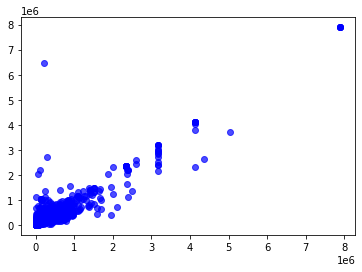

In [42]:
plt.scatter(y_test, y_hat_rf, color="blue", alpha=0.7) # Predicted v Actual

In [43]:
rf.score(X_test,y_test) # Rsq measure

0.8540344219623679

Text(0, 0.5, 'Mean decrease in impurity')

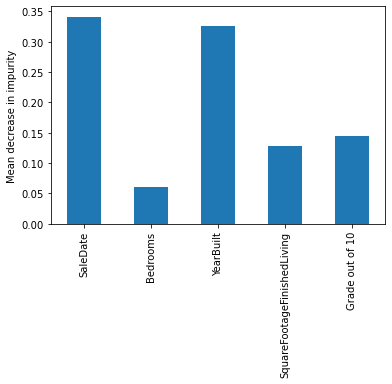

In [46]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()
plt.ylabel("Mean decrease in impurity")